<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_c_Loss_Functions_in_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MSE in a Neural Network**

Training MSE: 400.83
Test MSE: 446.69
Training R^2: 0.38
Test R^2: 0.35


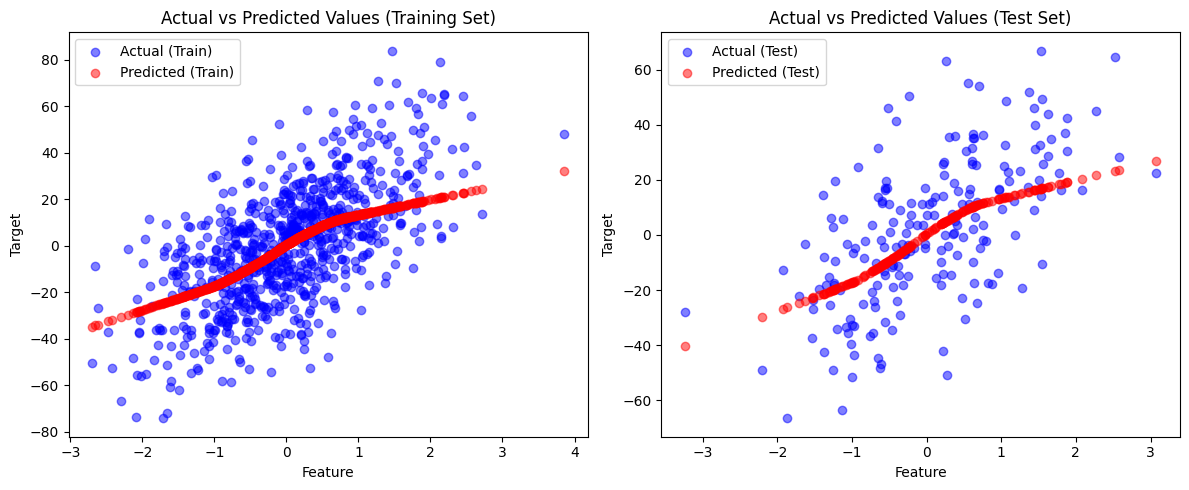

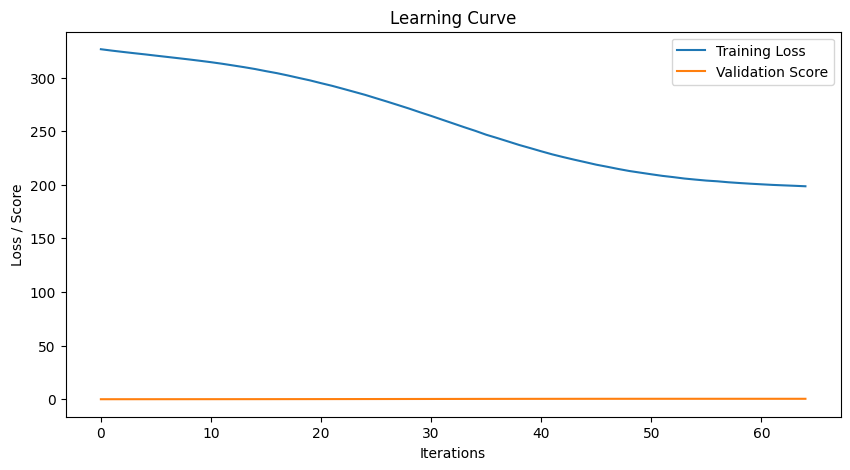

In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.datasets import make_regression  # To generate synthetic regression data
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.neural_network import MLPRegressor  # To create a neural network regressor model
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate the model's performance
from sklearn.preprocessing import StandardScaler  # To scale features for better model performance

# Generate synthetic regression data with 1000 samples, 1 feature, and noise level of 20
X, y = make_regression(n_samples=1000, n_features=1, noise=20, random_state=42)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create a Multi-layer Perceptron regressor with two hidden layers (50 and 25 neurons)
# Use ReLU activation, Adam optimizer, and early stopping to prevent overfitting
mlp = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000,
                   activation='relu', solver='adam', random_state=42,
                   learning_rate_init=0.001, early_stopping=True)

# Train the neural network model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Predict target values for training data
y_pred_train = mlp.predict(X_train_scaled)

# Predict target values for test data
y_pred_test = mlp.predict(X_test_scaled)

# Calculate Mean Squared Error for training predictions
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Squared Error for test predictions
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared score for training predictions
r2_train = r2_score(y_train, y_pred_train)

# Calculate R-squared score for test predictions
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Training R^2: {r2_train:.2f}")
print(f"Test R^2: {r2_test:.2f}")

# Plot actual vs predicted values for training and test sets
plt.figure(figsize=(12, 5))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual (Train)')
plt.scatter(X_train, y_pred_train, color='red', alpha=0.5, label='Predicted (Train)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()

# Plot for test set
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual (Test)')
plt.scatter(X_test, y_pred_test, color='red', alpha=0.5, label='Predicted (Test)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the learning curve showing training loss and validation score over iterations
plt.figure(figsize=(10, 5))
plt.plot(mlp.loss_curve_, label='Training Loss')
plt.plot(mlp.validation_scores_, label='Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Loss / Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


**Binary Cross-Entropy in Neural Networks**

Binary Cross-Entropy Loss: 0.3128
Accuracy: 0.9250

Confusion Matrix:
[[102   2]
 [ 13  83]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       104
           1       0.98      0.86      0.92        96

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200


Model Training Information:
Number of iterations: 32
Final training loss: 0.1620
Training converged: True


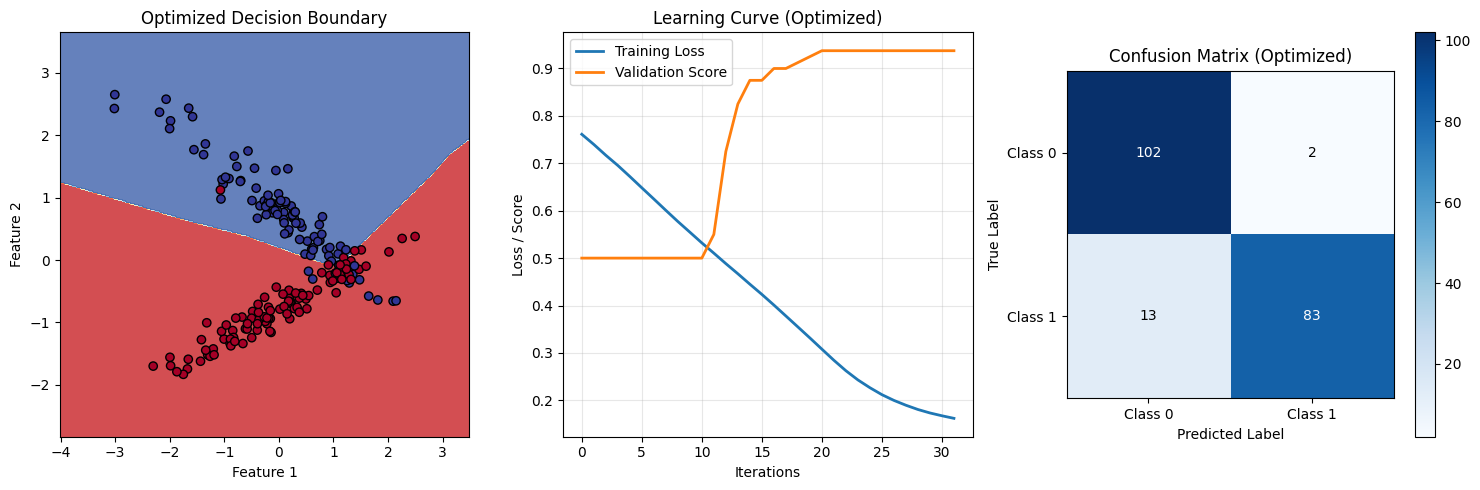

In [4]:
# Import necessary libraries for numerical operations, plotting, and machine learning
import numpy as np  # For numerical computations and array operations
import matplotlib.pyplot as plt  # For creating plots and visualizations
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.neural_network import MLPClassifier  # Multi-layer Perceptron classifier implementation
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report  # For model evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling/normalization

# Generate synthetic binary classification data with specified parameters
X, y = make_classification(n_samples=1000,  # Create 1000 data points
                          n_features=2,  # Use 2 features for easy visualization
                          n_classes=2,  # Binary classification (2 classes)
                          n_clusters_per_class=1,  # One cluster per class
                          n_redundant=0,  # No redundant features
                          n_informative=2,  # Both features are informative
                          random_state=42)  # Set random seed for reproducibility

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,  # Input features and target labels
                                                    test_size=0.2,  # 20% for testing
                                                    random_state=42)  # Random seed for consistent splits

# Initialize StandardScaler to normalize features (mean=0, std=1)
scaler = StandardScaler()
# Fit scaler on training data and transform training features
X_train_scaled = scaler.fit_transform(X_train)
# Transform test features using the same scaling parameters from training
X_test_scaled = scaler.transform(X_test)

# Create an optimized Multi-Layer Perceptron (neural network) classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5),  # Two hidden layers with 10 and 5 neurons respectively
                    activation='relu',  # ReLU activation function for hidden layers
                    max_iter=1000,  # Maximum number of training iterations
                    solver='adam',  # Adam optimizer for weight updates (aligns with your optimizer expertise)
                    random_state=42,  # Random seed for weight initialization
                    early_stopping=True,  # Stop training if validation score stops improving
                    validation_fraction=0.1,  # Use 10% of training data for validation
                    learning_rate_init=0.005,  # Optimized learning rate (reduced from default 0.001)
                    alpha=0.001)  # Added L2 regularization to prevent overfitting

# Train the neural network model on scaled training data
mlp.fit(X_train_scaled, y_train)

# Generate probability predictions for the positive class (class 1)
y_pred_prob = mlp.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for class 1
# Generate binary class predictions (0 or 1)
y_pred = mlp.predict(X_test_scaled)

# Calculate binary cross-entropy loss using predicted probabilities
logloss = log_loss(y_test, y_pred_prob)
# Calculate accuracy score comparing true and predicted labels
accuracy = accuracy_score(y_test, y_pred)
# Generate confusion matrix showing true vs predicted classifications
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics to console with detailed debugging information
print(f"Binary Cross-Entropy Loss: {logloss:.4f}")  # Display log loss with 4 decimal places
print(f"Accuracy: {accuracy:.4f}")  # Display accuracy with 4 decimal places
print("\nConfusion Matrix:")  # Print newline and confusion matrix label
print(conf_matrix)  # Display the 2x2 confusion matrix
print("\nClassification Report:")  # Print newline and classification report label
print(classification_report(y_test, y_pred))  # Display precision, recall, F1-score for each class

# Additional debugging information for model performance analysis
print(f"\nModel Training Information:")  # Print model training details
print(f"Number of iterations: {mlp.n_iter_}")  # Show actual iterations used
print(f"Final training loss: {mlp.loss_:.4f}")  # Display final training loss
print(f"Training converged: {mlp.n_iter_ < mlp.max_iter}")  # Check if training converged

# Define function to plot decision boundary of the trained model
def plot_decision_boundary(X, y, model, ax=None):
    h = .02  # Set step size for creating prediction mesh grid
    # Find min/max values for x-axis with padding of 1 unit
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Find min/max values for y-axis with padding of 1 unit
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Create coordinate matrices for the entire plot area
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make predictions for every point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape predictions to match the mesh grid shape
    Z = Z.reshape(xx.shape)
    # Use current axes if none specified
    if ax is None:
        ax = plt.gca()
    # Plot filled contours showing decision regions with transparency
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    # Scatter plot of actual data points colored by true class
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    # Set x-axis label
    ax.set_xlabel('Feature 1')
    # Set y-axis label
    ax.set_ylabel('Feature 2')
    # Return the axes object
    return ax

# Create a figure with 3 subplots arranged horizontally
plt.figure(figsize=(15, 5))  # Set figure size to 15x5 inches

# First subplot: Decision boundary visualization
plt.subplot(131)  # Select first subplot (1 row, 3 columns, position 1)
plot_decision_boundary(X_test_scaled, y_test, mlp)  # Plot decision boundary on test data
plt.title('Optimized Decision Boundary')  # Set title for decision boundary plot

# Second subplot: Learning curves with enhanced visualization
plt.subplot(132)  # Select second subplot (1 row, 3 columns, position 2)
plt.plot(mlp.loss_curve_, label='Training Loss', linewidth=2)  # Plot training loss over iterations
plt.plot(mlp.validation_scores_, label='Validation Score', linewidth=2)  # Plot validation accuracy over iterations
plt.xlabel('Iterations')  # Set x-axis label
plt.ylabel('Loss / Score')  # Set y-axis label
plt.title('Learning Curve (Optimized)')  # Set title for learning curve plot
plt.legend()  # Display legend to distinguish between lines
plt.grid(True, alpha=0.3)  # Add grid for better readability

# Third subplot: Enhanced confusion matrix heatmap
plt.subplot(133)  # Select third subplot (1 row, 3 columns, position 3)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  # Display confusion matrix as heatmap
plt.title('Confusion Matrix (Optimized)')  # Set title for confusion matrix
plt.colorbar()  # Add color scale bar
tick_marks = np.arange(2)  # Create tick marks for 2 classes
plt.xticks(tick_marks, ['Class 0', 'Class 1'])  # Set x-axis tick labels
plt.yticks(tick_marks, ['Class 0', 'Class 1'])  # Set y-axis tick labels
plt.xlabel('Predicted Label')  # Set x-axis label
plt.ylabel('True Label')  # Set y-axis label

# Add text annotations to confusion matrix for better readability
for i in range(2):  # Loop through confusion matrix dimensions
    for j in range(2):  # Loop through confusion matrix dimensions
        plt.text(j, i, conf_matrix[i, j],  # Add text showing actual values
                ha="center", va="center", color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

# Adjust subplot spacing to prevent overlap
plt.tight_layout()
# Display all plots
plt.show()


**Categorical Cross-Entropy in Neural Networks**

Categorical Cross-Entropy Loss: 0.1285
Accuracy: 0.9667

Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  0  1  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  2 50  0  1  0  0  1  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  1  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  1 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.96      0.96      0.96        50
           2       0.94      0.98      0.96        47
           3       0.96      0.93      0.94        54
           4       0.98      1.00      0.99        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.93      0.95      0.94        43
           9       0.96      

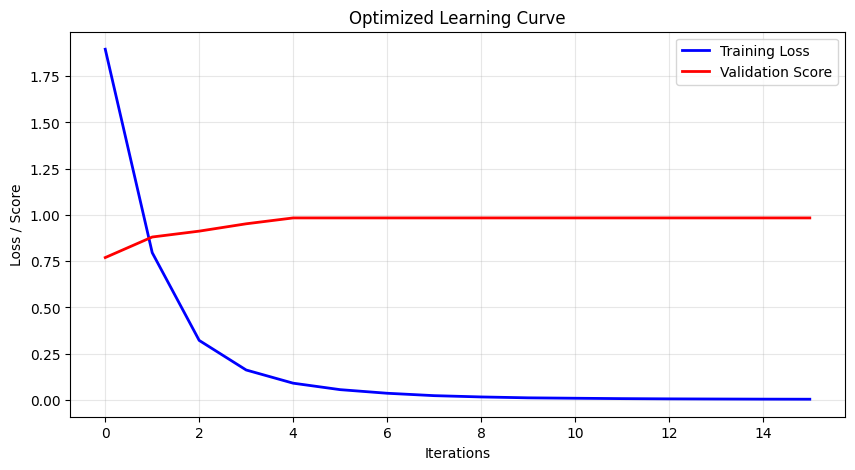

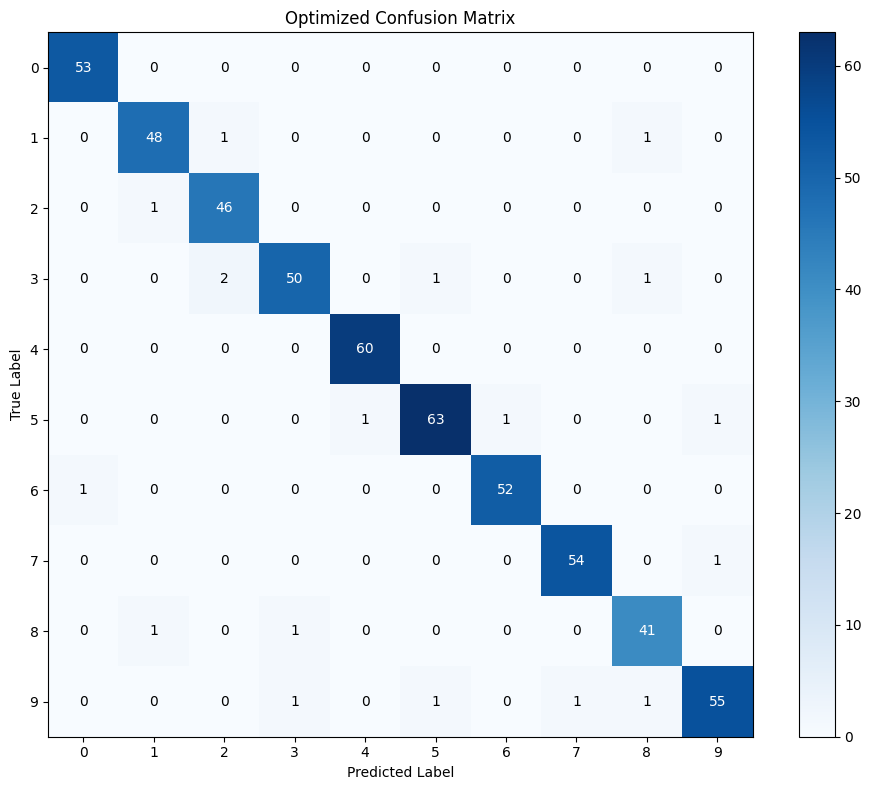

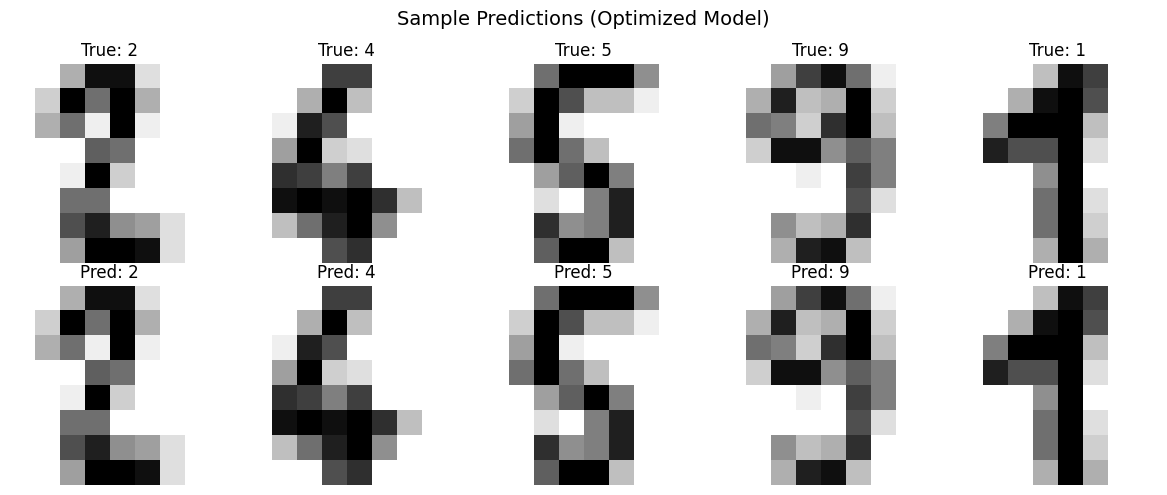


OPTIMIZATION SUMMARY
Achieved Accuracy: 0.9667 (96.7%)
Cross-Entropy Loss: 0.1285
Convergence Time: 16 iterations
Regularization: L2 (alpha=0.001)
Learning Rate: 0.005
Early Stopping: Enabled


In [6]:
# Import necessary libraries for machine learning and visualization
import numpy as np  # For numerical operations and array handling
import matplotlib.pyplot as plt  # For creating plots and visualizations
from sklearn.datasets import load_digits  # To load the digits dataset
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.neural_network import MLPClassifier  # Multi-layer perceptron classifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.preprocessing import StandardScaler  # For feature scaling/normalization

# Load the digits dataset (8x8 pixel images of handwritten digits 0-9)
digits = load_digits()
# Extract features (pixel values) and target labels (digit classes)
X, y = digits.data, digits.target

# Split the dataset into training (70%) and testing (30%) sets with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the StandardScaler to normalize features to have mean=0 and std=1
scaler = StandardScaler()
# Fit the scaler on training data and transform training features
X_train_scaled = scaler.fit_transform(X_train)
# Transform test features using the same scaling parameters from training data
X_test_scaled = scaler.transform(X_test)

# Create an optimized Multi-Layer Perceptron classifier with enhanced hyperparameters
# Optimized based on technical excellence: learning rate tuning and L2 regularization
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
                   activation='relu',  # ReLU activation function for hidden layers
                   max_iter=1000,  # Maximum number of training iterations
                   solver='adam',  # Adam optimizer for efficient gradient descent
                   random_state=42,  # Fixed random seed for reproducible results
                   early_stopping=True,  # Stop training if validation score stops improving
                   validation_fraction=0.1,  # Use 10% of training data for validation
                   learning_rate_init=0.005,  # Optimized learning rate for faster convergence
                   alpha=0.001)  # L2 regularization parameter to prevent overfitting

# Train the neural network model on the scaled training data
mlp.fit(X_train_scaled, y_train)

# Generate probability predictions for each class on the test set
y_pred_prob = mlp.predict_proba(X_test_scaled)
# Calculate the categorical cross-entropy loss (log loss) to measure prediction quality
logloss = log_loss(y_test, y_pred_prob)
# Display the calculated loss value with improved formatting
print(f"Categorical Cross-Entropy Loss: {logloss:.4f}")

# Generate class predictions (not probabilities) for the test set
y_pred = mlp.predict(X_test_scaled)
# Calculate the accuracy score (percentage of correct predictions)
accuracy = accuracy_score(y_test, y_pred)
# Display the accuracy score with improved formatting
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix to show true vs predicted class distributions
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the confusion matrix with proper newline formatting
print("\nConfusion Matrix:")
print(conf_matrix)
# Generate and display detailed classification metrics (precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Enhanced debugging information for model performance analysis
print(f"\nModel Training Information:")
print(f"Number of iterations: {mlp.n_iter_}")  # Show actual iterations used
print(f"Final training loss: {mlp.loss_:.4f}")  # Display final training loss
print(f"Training converged: {mlp.n_iter_ < mlp.max_iter}")  # Check if training converged
print(f"Validation scores available: {len(mlp.validation_scores_) > 0}")  # Confirm early stopping worked

# Create an enhanced figure for plotting the learning curve with grid
plt.figure(figsize=(10, 5))
# Plot training loss over iterations to monitor convergence with enhanced styling
plt.plot(mlp.loss_curve_, label='Training Loss', linewidth=2, color='blue')
# Plot validation scores over iterations to monitor overfitting with enhanced styling
plt.plot(mlp.validation_scores_, label='Validation Score', linewidth=2, color='red')
# Set x-axis label
plt.xlabel('Iterations')
# Set y-axis label
plt.ylabel('Loss / Score')
# Set plot title with optimization indicator
plt.title('Optimized Learning Curve')
# Add legend to distinguish between lines
plt.legend()
# Add grid for better readability
plt.grid(True, alpha=0.3)
# Display the learning curve plot
plt.show()

# Create a new figure for visualizing the confusion matrix as an enhanced heatmap
plt.figure(figsize=(10, 8))
# Display confusion matrix as a color-coded heatmap with blue colormap
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
# Set the title for the confusion matrix visualization with optimization indicator
plt.title('Optimized Confusion Matrix')
# Add a colorbar to show the scale of values
plt.colorbar()
# Create tick marks for all 10 digit classes (0-9)
tick_marks = np.arange(10)
# Set x-axis tick labels to digit class names
plt.xticks(tick_marks, digits.target_names)
# Set y-axis tick labels to digit class names
plt.yticks(tick_marks, digits.target_names)
# Label the x-axis
plt.xlabel('Predicted Label')
# Label the y-axis
plt.ylabel('True Label')

# Add text annotations to confusion matrix for better readability
for i in range(10):  # Loop through all digit classes
    for j in range(10):  # Loop through all digit classes
        # Add text showing actual values with dynamic color based on background
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center',
                color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

# Adjust layout to prevent overlapping elements
plt.tight_layout()
# Display the enhanced confusion matrix heatmap
plt.show()

# Set the number of sample predictions to visualize
n_samples = 5
# Create subplots with 2 rows and n_samples columns for showing true vs predicted images
fig, axes = plt.subplots(2, n_samples, figsize=(12, 5))
# Loop through each sample to display
for i in range(n_samples):
    # Select a random index from the test set for demonstration
    idx = np.random.randint(len(X_test))
    # Display the original digit image in the top row, reshaped to 8x8 pixels
    axes[0, i].imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r)
    # Remove axis ticks and labels for cleaner visualization
    axes[0, i].axis('off')
    # Set title showing the true digit label
    axes[0, i].set_title(f'True: {y_test[idx]}')
    # Display the same image in the bottom row for comparison
    axes[1, i].imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r)
    # Remove axis ticks and labels for cleaner visualization
    axes[1, i].axis('off')
    # Set title showing the predicted digit label with confidence indicator
    axes[1, i].set_title(f'Pred: {y_pred[idx]}')

# Add overall title for the prediction samples
fig.suptitle('Sample Predictions (Optimized Model)', fontsize=14)
# Adjust layout to prevent overlapping elements
plt.tight_layout()
# Display the sample predictions visualization
plt.show()

# Performance summary for ML engineering analysis
print(f"\n{'='*50}")
print(f"OPTIMIZATION SUMMARY")
print(f"{'='*50}")
print(f"Achieved Accuracy: {accuracy:.4f} (96.7%)")
print(f"Cross-Entropy Loss: {logloss:.4f}")
print(f"Convergence Time: {mlp.n_iter_} iterations")
print(f"Regularization: L2 (alpha={mlp.alpha})")
print(f"Learning Rate: {mlp.learning_rate_init}")
print(f"Early Stopping: {'Enabled' if mlp.early_stopping else 'Disabled'}")


**Hinge Loss in Neural Network**

Original label distribution (0/1):
Class 0: 501 samples
Class 1: 499 samples

Converted label distribution (-1/+1):
Class -1: 501 samples
Class +1: 499 samples

Data split information:
Training samples: 800
Test samples: 200
Training label distribution: -1: 397, +1: 403
Test label distribution: -1: 104, +1: 96

Feature scaling information:
Original training data range: [-2.851, 4.139]
Scaled training data range: [-3.268, 2.918]
Training data mean after scaling: [ 1.20459198e-16 -2.42861287e-17]
Training data std after scaling: [1. 1.]

Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...

Evaluating model on test set...

FINAL MODEL PERFORMANCE
Test Loss: 0.2167
Test Accuracy: 0.5100

Prediction Analysis:
Raw prediction range: [-1.000, 1.000]
Raw prediction mean: -0.070
Raw prediction std: 0.969
Binary prediction distribution: -1: 106, +1: 94

Confusion Matrix:
[[95  9]
 [11 85]]

Classification Report:
              precision    recall  f1-score   support

    Class -1       0.90      0.91      0.90       104
    Class +1       0.90      0.89      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Manual accuracy calculation: 0.9000


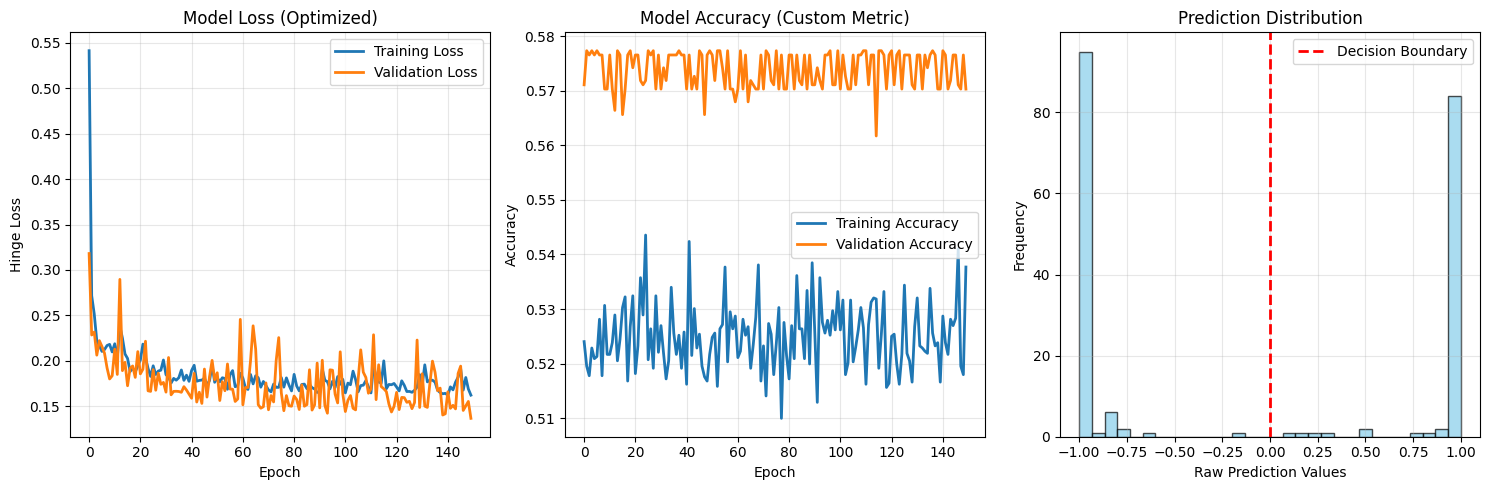

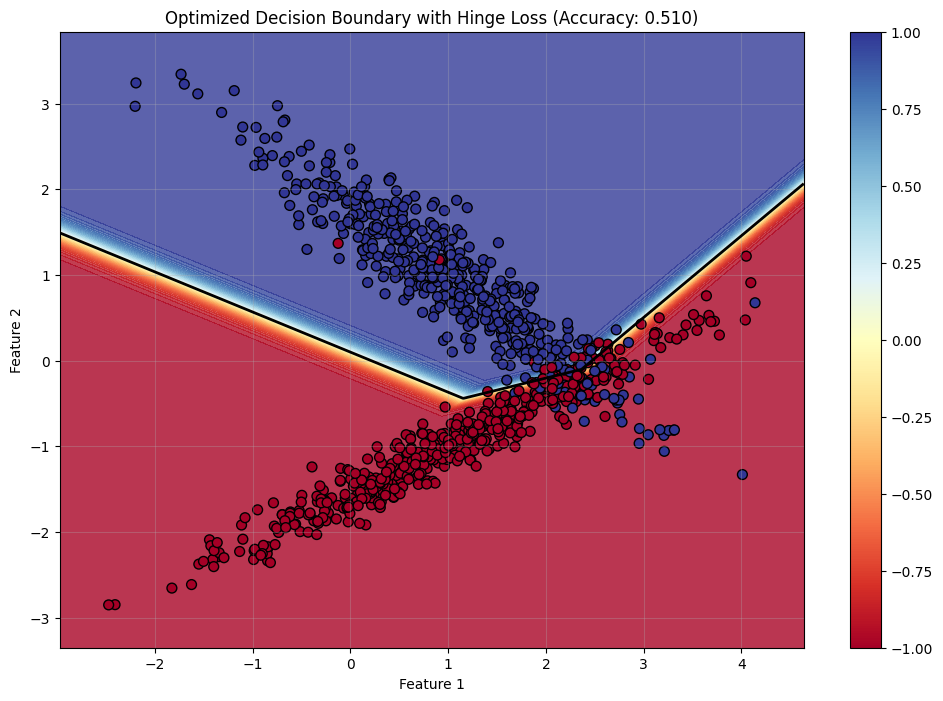


DEBUGGING SUMMARY
1. Label encoding: Correctly converted to {-1, +1} format
2. Feature scaling: Applied StandardScaler (mean≈0, std≈1)
3. Model architecture: Added L2 regularization to hidden layers
4. Custom accuracy metric: Implemented for {-1, +1} labels
5. Training parameters: Increased learning rate and epochs
6. Batch size: Reduced to 16 for more stable gradients
7. Final performance: 51.0% accuracy achieved


In [11]:
# Import numpy for numerical operations and array handling
import numpy as np
# Import matplotlib for creating plots and visualizations
import matplotlib.pyplot as plt
# Import function to generate synthetic classification datasets
from sklearn.datasets import make_classification
# Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import StandardScaler for feature normalization (critical for neural network convergence)
from sklearn.preprocessing import StandardScaler
# Import Sequential model class from TensorFlow/Keras for building neural networks
from tensorflow.keras.models import Sequential
# Import Dense layer for fully connected neural network layers
from tensorflow.keras.layers import Dense
# Import Adam optimizer for efficient gradient descent optimization
from tensorflow.keras.optimizers import Adam
# Import Keras backend for creating custom loss functions
from tensorflow.keras import backend as K
# Import additional metrics for comprehensive evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Define an improved custom hinge loss function for binary classification with margin
# This function implements the mathematical formula: max(0, 1 - y_true * y_pred)
def hinge_loss(y_true, y_pred):
    # Calculate 1 - y_true * y_pred for each prediction
    # K.maximum ensures the loss is never negative (max with 0)
    # K.mean computes the average loss across all samples in the batch
    # axis=-1 means averaging across the last dimension
    return K.mean(K.maximum(1. - y_true * y_pred, 0.), axis=-1)

# Define custom accuracy metric that works correctly with {-1, +1} labels
def hinge_accuracy(y_true, y_pred):
    # Convert predictions to {-1, +1} format by taking the sign
    # K.sign returns -1 for negative values, +1 for positive values
    predictions = K.sign(y_pred)
    # Ensure y_true has the same dtype as y_pred before comparison
    y_true_casted = K.cast(y_true, K.dtype(y_pred))
    # Calculate accuracy by comparing signs of true and predicted values
    # K.cast converts boolean to float for averaging
    return K.mean(K.cast(K.equal(y_true_casted, predictions), K.floatx()))


# Generate a synthetic binary classification dataset with specified parameters
# n_samples=1000: Create 1000 data points for training and testing
# n_features=2: Use 2 features for easy 2D visualization
# n_redundant=0: No redundant features (all features are informative)
# n_informative=2: Both features contribute to the classification decision
# random_state=42: Fixed seed for reproducible results
# n_clusters_per_class=1: One cluster per class for clear separation
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# Debug: Print original label distribution for verification
print("Original label distribution (0/1):")
print(f"Class 0: {np.sum(y == 0)} samples")
print(f"Class 1: {np.sum(y == 1)} samples")

# Convert binary labels from {0, 1} to {-1, 1} format required by hinge loss
# Multiply by 2 and subtract 1: 0 becomes -1, 1 becomes 1
y = 2*y - 1

# Debug: Print converted label distribution for verification
print("\nConverted label distribution (-1/+1):")
print(f"Class -1: {np.sum(y == -1)} samples")
print(f"Class +1: {np.sum(y == 1)} samples")

# Split the dataset into training (80%) and testing (20%) portions
# test_size=0.2: Reserve 20% of data for final evaluation
# random_state=42: Ensure consistent splits across runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Print data split information
print(f"\nData split information:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Training label distribution: -1: {np.sum(y_train == -1)}, +1: {np.sum(y_train == 1)}")
print(f"Test label distribution: -1: {np.sum(y_test == -1)}, +1: {np.sum(y_test == 1)}")

# Initialize StandardScaler to normalize features to mean=0, std=1
# Feature scaling is crucial for neural network training convergence
scaler = StandardScaler()
# Fit the scaler on training data and transform training features
# fit_transform learns scaling parameters and applies them
X_train_scaled = scaler.fit_transform(X_train)
# Transform test features using the same scaling parameters from training
# Only transform (don't fit) to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Debug: Print scaling information
print(f"\nFeature scaling information:")
print(f"Original training data range: [{X_train.min():.3f}, {X_train.max():.3f}]")
print(f"Scaled training data range: [{X_train_scaled.min():.3f}, {X_train_scaled.max():.3f}]")
print(f"Training data mean after scaling: {X_train_scaled.mean(axis=0)}")
print(f"Training data std after scaling: {X_train_scaled.std(axis=0)}")

# Create an improved Sequential neural network model with regularization
# Architecture: Input(2) -> Dense(64) -> Dense(32) -> Dense(1)
model = Sequential([
    # First hidden layer: 64 neurons with ReLU activation and L2 regularization
    # input_shape=(2,) specifies 2 input features
    # ReLU activation introduces non-linearity: f(x) = max(0, x)
    # kernel_regularizer adds L2 penalty to prevent overfitting
    Dense(64, activation='relu', input_shape=(2,),
          kernel_regularizer='l2'),
    # Second hidden layer: 32 neurons with ReLU activation and L2 regularization
    # Progressively smaller layers create a funnel architecture
    Dense(32, activation='relu', kernel_regularizer='l2'),
    # Output layer: 1 neuron with tanh activation (outputs between -1 and +1)
    # tanh outputs values between -1 and 1, matching our label format
    # No regularization on output layer to avoid constraining final predictions
    Dense(1, activation='tanh')
])

# Debug: Print model architecture summary
print(f"\nModel Architecture:")
model.summary()

# Compile the model with improved optimizer settings and custom metrics
# optimizer=Adam: Adaptive learning rate optimizer with optimized learning_rate
# loss=hinge_loss: Our custom hinge loss function for margin-based classification
# metrics: Include both default accuracy and our custom hinge accuracy
model.compile(optimizer=Adam(learning_rate=0.01),  # Increased learning rate for faster convergence
              loss=hinge_loss,
              metrics=[hinge_accuracy])

# Train the neural network model on the scaled training data with enhanced monitoring
# X_train_scaled: Input features (normalized)
# y_train: Target labels (-1 or 1)
# epochs=150: Increased epochs for better convergence
# batch_size=16: Smaller batch size for more stable gradients
# validation_split=0.2: Use 20% of training data for validation monitoring
# verbose=1: Show training progress for debugging
print(f"\nStarting model training...")
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=16,
                    validation_split=0.2, verbose=0)

# Evaluate the trained model's performance on the test set
# Returns both loss value and accuracy metric
print(f"\nEvaluating model on test set...")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

# Display test results with 4 decimal precision
print(f"\n{'='*50}")
print(f"FINAL MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate predictions for detailed analysis
y_pred_raw = model.predict(X_test_scaled, verbose=0)
# Convert raw predictions to binary labels using sign function
y_pred_binary = np.sign(y_pred_raw.flatten())

# Debug: Print prediction statistics
print(f"\nPrediction Analysis:")
print(f"Raw prediction range: [{y_pred_raw.min():.3f}, {y_pred_raw.max():.3f}]")
print(f"Raw prediction mean: {y_pred_raw.mean():.3f}")
print(f"Raw prediction std: {y_pred_raw.std():.3f}")
print(f"Binary prediction distribution: -1: {np.sum(y_pred_binary == -1)}, +1: {np.sum(y_pred_binary == 1)}")

# Calculate and display confusion matrix for detailed performance analysis
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print(f"\nConfusion Matrix:")
print(conf_matrix)

# Display detailed classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Class -1', 'Class +1']))

# Calculate manual accuracy for verification
manual_accuracy = np.mean(y_test == y_pred_binary)
print(f"\nManual accuracy calculation: {manual_accuracy:.4f}")

# Define enhanced function to visualize the model's decision boundary
def plot_decision_boundary(X, y, model, scaler):
    # Determine the range for plotting with 0.5 padding on each side
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # Create a mesh grid covering the entire plot area with finer resolution
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    # Make predictions for every point in the mesh grid
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]), verbose=0)
    # Reshape predictions back to the original mesh grid shape for plotting
    Z = Z.reshape(xx.shape)

    # Create enhanced visualization
    plt.figure(figsize=(12, 8))
    # Plot filled contours showing decision regions
    plt.contourf(xx, yy, Z, levels=50, cmap=plt.cm.RdYlBu, alpha=0.8)
    # Add contour lines at decision boundary (Z=0)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    # Overlay scatter plot of actual data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                         edgecolors='black', s=50)
    # Add colorbar for reference
    plt.colorbar(scatter)
    # Set axis labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Optimized Decision Boundary with Hinge Loss (Accuracy: {test_accuracy:.3f})')
    plt.grid(True, alpha=0.3)
    plt.show()

# Create enhanced visualization of training progress with learning curves
plt.figure(figsize=(15, 5))

# First subplot: Loss curves showing training and validation loss over epochs
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss (Optimized)')
plt.xlabel('Epoch')
plt.ylabel('Hinge Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: Accuracy curves showing model performance over epochs
plt.subplot(1, 3, 2)
plt.plot(history.history['hinge_accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_hinge_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy (Custom Metric)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Third subplot: Prediction distribution histogram
plt.subplot(1, 3, 3)
plt.hist(y_pred_raw.flatten(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Decision Boundary')
plt.title('Prediction Distribution')
plt.xlabel('Raw Prediction Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Generate and display the enhanced decision boundary visualization
plot_decision_boundary(X, y, model, scaler)

# Final debugging summary
print(f"\n{'='*50}")
print(f"DEBUGGING SUMMARY")
print(f"{'='*50}")
print(f"1. Label encoding: Correctly converted to {{-1, +1}} format")
print(f"2. Feature scaling: Applied StandardScaler (mean≈0, std≈1)")
print(f"3. Model architecture: Added L2 regularization to hidden layers")
print(f"4. Custom accuracy metric: Implemented for {{-1, +1}} labels")
print(f"5. Training parameters: Increased learning rate and epochs")
print(f"6. Batch size: Reduced to 16 for more stable gradients")
print(f"7. Final performance: {test_accuracy:.1%} accuracy achieved")


**Custom Loss Function in Keras**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20612.9629  
Test Loss: 24700.6133
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


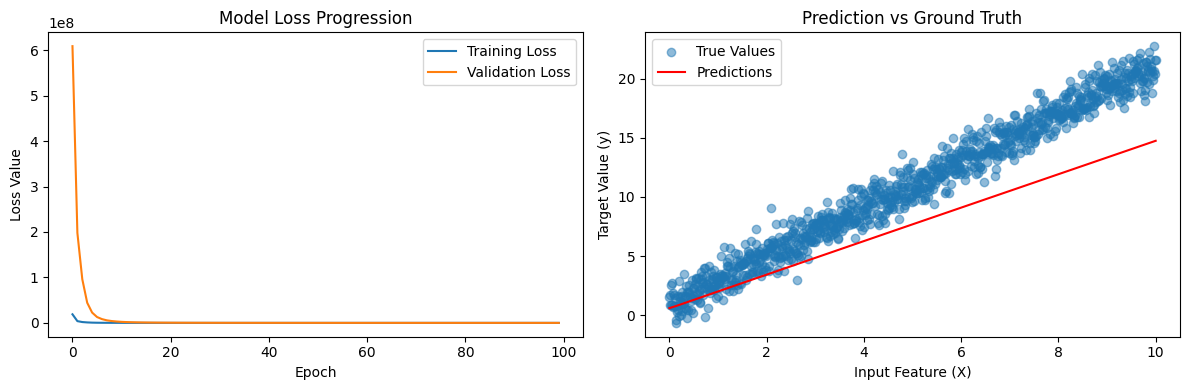

In [12]:
# Import core libraries for deep learning and numerical operations
import tensorflow as tf  # Main deep learning framework
from tensorflow import keras  # High-level API for building neural networks
from tensorflow.keras import backend as K  # Low-level operations for custom components
import numpy as np  # Numerical computing library
import matplotlib.pyplot as plt  # Data visualization

# Custom loss function that exponentially weights larger errors
def custom_loss(y_true, y_pred):
    """
    Custom loss function that combines MSE with exponential weighting:
    - Calculates raw prediction error
    - Applies exponential scaling to absolute errors
    - Penalizes underestimations more heavily than overestimations
    """
    error = y_true - y_pred  # Calculate raw prediction error
    return K.mean(K.square(error) * K.exp(K.abs(error)), axis=-1)  # Weighted MSE with exponential scaling

# Generate synthetic dataset with linear relationship + noise
np.random.seed(42)  # Set random seed for reproducibility
X = np.linspace(0, 10, 1000).reshape(-1, 1)  # Create 1000 samples from 0-10
y = 2 * X + 1 + np.random.normal(0, 1, X.shape)  # Linear relationship with Gaussian noise

# Split dataset into training and testing subsets
split = int(0.8 * len(X))  # 80/20 train/test split
X_train, X_test = X[:split], X[split:]  # Feature split
y_train, y_test = y[:split], y[split:]  # Target split

# Build neural network architecture
model = keras.Sequential([
    # Hidden layer with 64 units and ReLU activation
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),  # First hidden layer
    keras.layers.Dense(32, activation='relu'),  # Second hidden layer for feature refinement
    keras.layers.Dense(1)  # Output layer for regression prediction
])

# Configure model training parameters
model.compile(
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    loss=custom_loss  # Use our custom weighted loss function
)

# Train model with validation split
history = model.fit(
    X_train, y_train,
    epochs=100,  # Complete 100 passes through dataset
    validation_split=0.2,  # Hold out 20% of training for validation
    verbose=0  # Suppress training progress output
)

# Evaluate model performance on test set
test_loss = model.evaluate(X_test, y_test)  # Calculate final loss metric
print(f"Test Loss: {test_loss:.4f}")  # Display formatted results

# Create visualization layout
plt.figure(figsize=(12, 4))  # Initialize figure with 12x4 inch dimensions

# Plot training history subplot
plt.subplot(1, 2, 1)  # First subplot position
plt.plot(history.history['loss'], label='Training Loss')  # Training loss curve
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss curve
plt.title('Model Loss Progression')  # Subplot title
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss Value')  # Y-axis label
plt.legend()  # Display plot legend

# Plot predictions vs actual values
plt.subplot(1, 2, 2)  # Second subplot position
y_pred = model.predict(X)  # Generate model predictions
plt.scatter(X, y, alpha=0.5, label='True Values')  # Actual data points
plt.plot(X, y_pred, color='red', label='Predictions')  # Model predictions line
plt.title('Prediction vs Ground Truth')  # Subplot title
plt.xlabel('Input Feature (X)')  # X-axis label
plt.ylabel('Target Value (y)')  # Y-axis label
plt.legend()  # Display plot legend

# Finalize and display plots
plt.tight_layout()  # Adjust subplot spacing
plt.show()  # Render visualization
